In [54]:
from vectorizer import cluster_paragraphs
from vectorizer import vectorize_text
from random import shuffle
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize
import numpy as np
from nltk.cluster.util import cosine_distance



In [55]:
# Separando dados dos países a serem avaliados
df = pd.read_csv('/home/raime/Documentos/Repositórios/text_clustering/latam.csv')
nomes_colunas = df.columns
dados_brasil = df.loc[df[' País donde se chequeó la desinformación']== "Brasil"]
dados_mexico = df.loc[df[' País donde se chequeó la desinformación']== "México"]


In [56]:
# criação de 2 listas de notícias, uma para o brasil e outra para o mexico
 
noticias_brasil = dados_brasil['Desinformación o afirmación chequeada (o título del explicador)']

lista_de_noticias_br = []

for noticia in noticias_brasil:
    lista_de_noticias_br.append(noticia)

type(lista_de_noticias_br)
# lista de noticias_br extraídas do banco de dados.

noticias_mexico = dados_mexico['Desinformación o afirmación chequeada (o título del explicador)']

lista_de_noticias_me = []

for news in noticias_mexico:
    lista_de_noticias_me.append(news)

type(lista_de_noticias_me)

#lista_de_noticias_me extraídas do banco de dados.


list

In [57]:
# vetorizando textos e removendo pontuações
vetores_br = []
for i in lista_de_noticias_br:
    vetores_br.append(vectorize_text(i))

vetores_me = []
for t in lista_de_noticias_me:
    vetores_me.append(vectorize_text(t))


In [5]:
# preparo de dados para bag of words
bag_of_words_br = []
for vetores in vetores_br:
    for palavras in vetores:
        bag_of_words_br.append(palavras)

bag_of_words_me = []
for vectores in vetores_me:
    for palabras in vectores:
        bag_of_words_me.append(palabras)

# removendo stop words
stopword = nltk.corpus.stopwords.words('spanish')

def remove_stopwords(bag_of_words_br): #removendo stopwords
    bag_of_words_br = [word for word in bag_of_words_br if word not in stopword]
    return bag_of_words_br

def remove_stoppalabras(bag_of_words_me):
    bag_of_words_me = [word for word in bag_of_words_me if word not in stopword]
    return bag_of_words_me

textos_mexico = remove_stoppalabras(bag_of_words_me)
textos_brasil = remove_stopwords(bag_of_words_br)

# contando quantas palavras diferentes foram uutilzadas
total_palavras_unicas_brasil = list(set(textos_brasil))
total_palavras_unicas_mexico = list(set(textos_mexico))

print('Para o Brasil: \n O número de notícias foram de:',len(lista_de_noticias_br),'\n O número de palavras inicialmente encontradas nas notícias brasileiras foram de:',len(bag_of_words_br),'\n O número de palavras restantes depois da remoção das stopwords foi de:',len(textos_brasil),'\n O número de palavras únicas, ou seja, sem repetição, foi de:',len(total_palavras_unicas_brasil),'\n')
print('Para o Mexico: \n O número de notícias foram de:',len(lista_de_noticias_me),'\n O número de palavras inicialmente encontradas nas notícias brasileiras foram de:',len(bag_of_words_me),'\n O número de palavras restantes depois da remoção das stopwords foi de:',len(textos_mexico),'\n O número de palavras únicas, ou seja, sem repetição, foi de:',len(total_palavras_unicas_mexico),'\n')

Para o Brasil: 
 O número de notícias foram de: 409 
 O número de palavras inicialmente encontradas nas notícias brasileiras foram de: 7236 
 O número de palavras restantes depois da remoção das stopwords foi de: 4170 
 O número de palavras únicas, ou seja, sem repetição, foi de: 1815 

Para o Mexico: 
 O número de notícias foram de: 339 
 O número de palavras inicialmente encontradas nas notícias brasileiras foram de: 4801 
 O número de palavras restantes depois da remoção das stopwords foi de: 2759 
 O número de palavras únicas, ou seja, sem repetição, foi de: 1443 



In [58]:
# função de remover stopwords para produzir cada vetor de cada notícia de maneira sem stopword
def br_remove_stopword_vector(vec):
    vec = [word for word in vec if word not in stopword]
    return vec

br_clean_vectors = []
for vec in vetores_br:
    vec = br_remove_stopword_vector(vec)
    br_clean_vectors.append(vec)

def me_remove_stopword_vector(vec):
    vec = [word for word in vec if word not in stopword]
    return vec

me_clean_vectors = []
for vec in vetores_br:
    vec = me_remove_stopword_vector(vec)
    me_clean_vectors.append(vec)

In [62]:
def similaridade(sentenca1,sentenca2):
    palavras1 = [palavra for palavra in nltk.word_tokenize(sentenca1)]
    palavras2 = [palavra for palavra in nltk.word_tokenize(sentenca2)]
    
    todas_palavras = list(set(palavras1 + palavras2))
    #print(todas_palavras)
    
    vetor1 = [0] * len(todas_palavras)
    vetor2 = [0] *len(todas_palavras)
    
    # print(vetor1)
    # print(vetor2)

    for palavra in palavras1:
        vetor1[todas_palavras.index(palavra)] +=1
    
    for palavra in palavras2:
        vetor2[todas_palavras.index(palavra)] +=1

    # print(vetor1)
    # print(vetor2)
    
    sml = 1 - cosine_distance(vetor1,vetor2)
    # print('As sentenças são ', sml *100,'% parecidas')

    return sml


def matrix_similaridade(br_clean_vectors): # comparação de cada item com o todo

    combinacoes = {}

    for i in range(len(br_clean_vectors)):
        for j in range(i + 1, len(br_clean_vectors)):

            a = ' '.join(br_clean_vectors[i])
            b = ' '.join(br_clean_vectors[j])
            c = similaridade(a,b)
            
            sentenca1 = str(a)
            sentenca2 = str(b)
            combinacoes.update({c:[sentenca1,sentenca2]})
    
    return combinacoes


In [63]:
h = matrix_similaridade(br_clean_vectors)

# tabela com grauu de similaridade
sml_df = pd.DataFrame.from_dict(h, orient = 'index')
sml_temp = sml_df.reset_index()
sml_final = sml_temp.set_axis(['Porcentagem de similaridade','sentenca 1', ' sentenca 2'], axis = 1, inplace = False)
tabela_similaridade = sml_final.sort_values(by=['Porcentagem de similaridade'],ascending=False)
tabela_similaridade.to_excel('Tabela de simiilaridade.xlsx')

            



Text(0.5, 1.0, 'Palavras mais comuns das notícias do México')

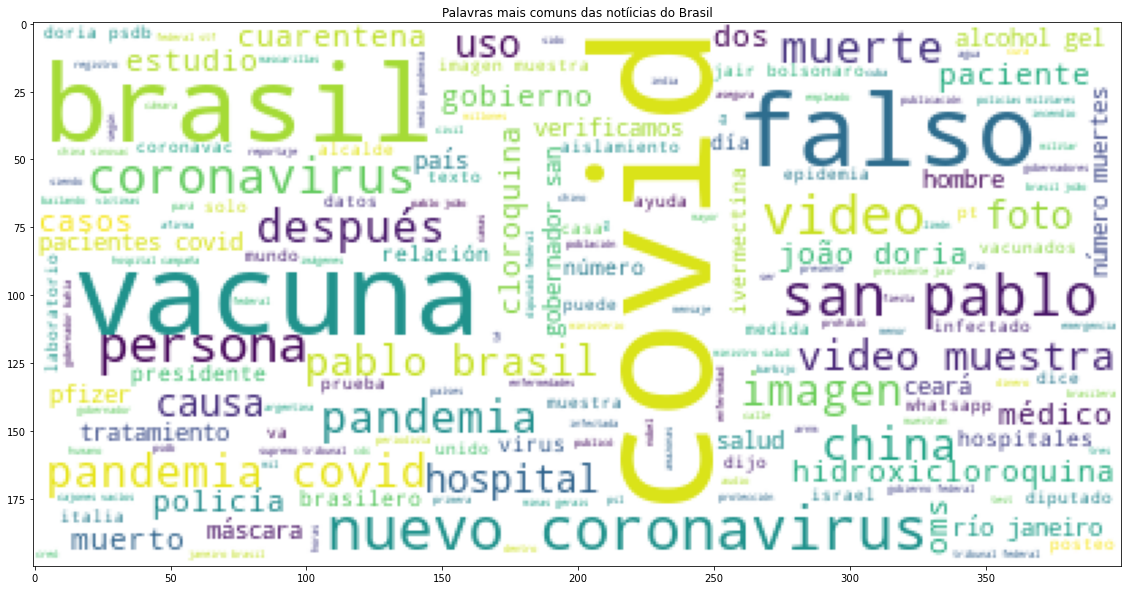

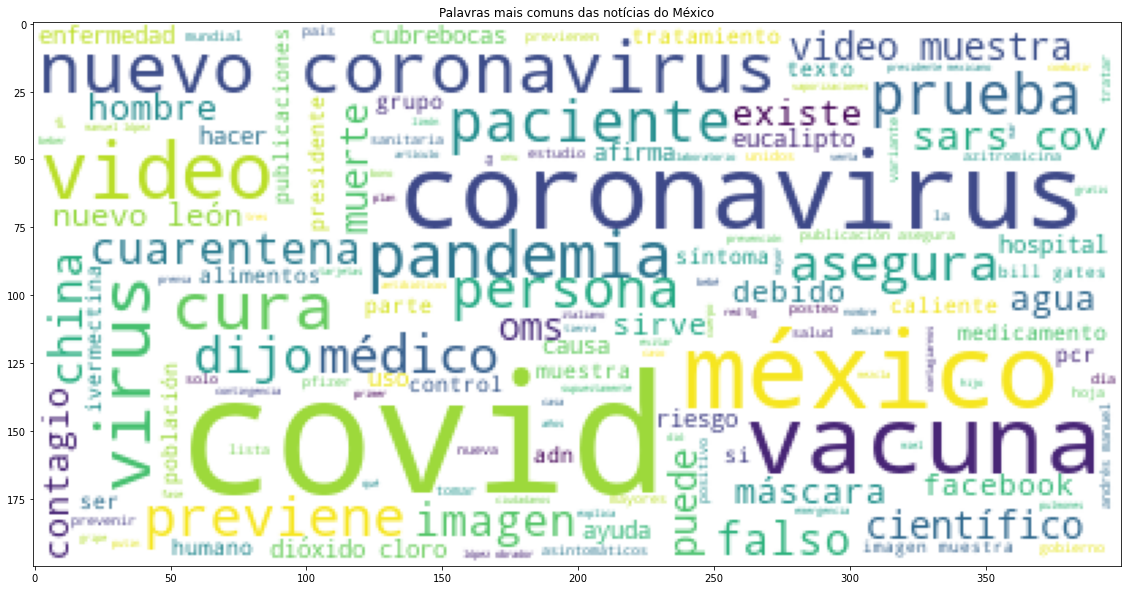

In [53]:
# nuvem de palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nuvem_br = ' '.join(textos_brasil) #preparando nuvem de palavras mais comuns br

plt.figure(figsize = (20,10))
plt.imshow(WordCloud(max_font_size=60,max_words=10000, background_color="white").generate(nuvem_br))
plt.title('Palavras mais comuns das notíicias do Brasil')

nuvem_me = ' '.join(textos_mexico)# nuvem de palavras mais comuns me

plt.figure(figsize=(20,10))
plt.imshow(WordCloud(max_font_size=60,max_words=10000, background_color="white").generate(nuvem_me))
plt.title('Palavras mais comuns das notícias do México')